In [244]:
import os
import librosa
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

# Base directory where "speech" and "song" folders are located
base_dir = "/content"

# Emotion code to label mapping
emotion_map = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fear",

}

def extract_label(filename):
    parts = filename.split("-")
    emotion_code = parts[2]  # Third element is emotion code
    return emotion_map.get(emotion_code, "unknown")

def extract_mfcc(file_path):
    y, sr = librosa.load(file_path, sr=22050)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    mfcc_mean = np.mean(mfcc.T, axis=0)
    return mfcc_mean

features = []
labels = []

# Traverse through both folders
for folder in ["speech", "song"]:
    folder_path = os.path.join(base_dir, folder)
    print(f"Processing folder: {folder_path}")

    # Walk through subdirectories
    for root, _, files in os.walk(folder_path):
        for file_name in files:
            if file_name.endswith(".wav"):
                file_path = os.path.join(root, file_name)
                try:
                    label = extract_label(file_name)
                    mfcc_features = extract_mfcc(file_path)
                    features.append(mfcc_features)
                    labels.append(label)
                    print(f"Processed: {file_name} -> Label: {label}")
                except Exception as e:
                    print(f"Error processing {file_name}: {e}")

# Create and save the DataFrame
df = pd.DataFrame(features)
df["label"] = labels
df.to_csv("ravdess_features.csv", index=False)
print("✅ Features and labels saved to ravdess_features.csv")


Processing folder: /content/speech
Processed: 03-02-02-01-01-01-17.wav -> Label: calm
Processed: 03-02-04-02-01-01-17.wav -> Label: sad
Processed: 03-02-02-02-02-01-17.wav -> Label: calm
Processed: 03-02-02-01-02-01-17.wav -> Label: calm
Processed: 03-02-06-01-01-02-17.wav -> Label: fear
Processed: 03-02-04-02-02-01-17.wav -> Label: sad
Processed: 03-02-03-01-02-01-17.wav -> Label: happy
Processed: 03-02-05-02-02-02-17.wav -> Label: angry
Processed: 03-02-03-02-01-02-17.wav -> Label: happy
Processed: 03-02-05-02-02-01-17.wav -> Label: angry
Processed: 03-02-06-02-02-02-17.wav -> Label: fear
Processed: 03-02-03-02-01-01-17.wav -> Label: happy
Processed: 03-02-06-01-01-01-17.wav -> Label: fear
Processed: 03-02-04-01-01-02-17.wav -> Label: sad
Processed: 03-02-05-01-02-02-17.wav -> Label: angry
Processed: 03-02-02-02-02-02-17.wav -> Label: calm
Processed: 03-02-06-02-01-01-17.wav -> Label: fear
Processed: 03-02-01-01-02-01-17.wav -> Label: neutral
Processed: 03-02-04-02-01-02-17.wav -> La

In [245]:
labels[:5]

['calm', 'sad', 'calm', 'calm', 'fear']

In [246]:
df=pd.DataFrame()
df['speech']=features
df['label']=labels
df.head()

speech label
0  [-597.70483, 67.39582, 0.5047752, 19.353815, 6...  calm
1  [-440.14362, 56.20885, -22.069736, 10.044056, ...   sad
2  [-613.71515, 65.924995, 6.901592, 18.479723, 6...  calm
3  [-559.51556, 68.197136, 0.9120114, 11.565609, ...  calm
4  [-543.719, 70.080734, -0.69239223, 16.319016, ...  fear

In [247]:
df['label'].value_counts()

label
calm       368
sad        368
fear       368
happy      368
angry      368
neutral    184
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

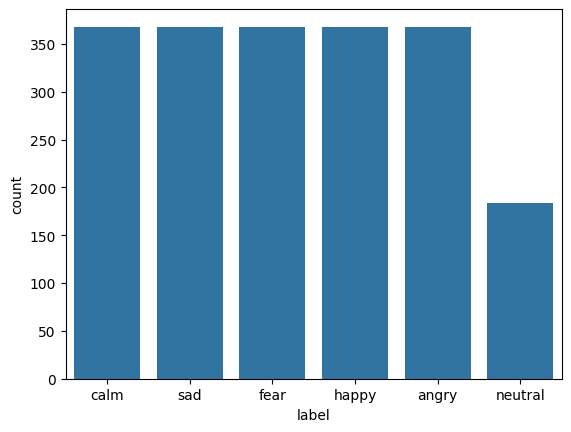

In [248]:
sns.countplot(x='label', data=df)

In [249]:

def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()

def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()

In [250]:
def extract_mfcc(filename):
    y,sr=librosa.load(filename,duration=3,offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc


In [251]:
def extract_mfcc(filename):
    y,sr=librosa.load(filename,duration=3,offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [252]:
features[:5]



[array([-5.9770483e+02,  6.7395821e+01,  5.0477523e-01,  1.9353815e+01,
         6.0941210e+00,  2.2747602e+00,  3.5598924e+00, -2.1561339e+00,
        -1.1661887e+01,  1.6449488e+00, -3.1505339e+00, -2.1181250e+00,
         6.9370050e+00, -3.5026720e+00, -3.1739998e+00,  1.3912648e+00,
        -5.4789348e+00, -3.1817234e+00, -2.6827345e+00, -2.3808935e+00,
        -2.8931985e+00,  3.4391902e-02, -6.4238605e+00,  2.7297384e-01,
        -4.0157638e+00,  3.0055959e+00, -4.1422820e+00, -1.6118637e+00,
        -2.9382231e+00,  5.3832704e-01,  4.5228603e-01,  3.3174973e+00,
         1.8994690e+00, -8.7579554e-01, -2.4288912e+00, -1.3154973e+00,
         5.2963843e+00,  1.0592437e+01,  1.5530466e+01,  1.6523104e+01],
       dtype=float32),
 array([-4.4014362e+02,  5.6208851e+01, -2.2069736e+01,  1.0044056e+01,
         6.3802361e+00, -6.5848627e-03, -4.1389155e+00, -2.5566907e+00,
        -1.5046888e+01, -1.4761440e+00,  1.5907434e+00, -8.3974285e+00,
         3.8731496e+00, -7.9643381e-01, 

In [253]:

import os
import pandas as pd

# Emotion map
emotion_map = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fear",

}

# Collect paths and labels
paths = []
labels = []

for root, _, files in os.walk("/content/speech"):  # or "/content/song" for the other folder
    for file in files:
        if file.endswith(".wav"):
            full_path = os.path.join(root, file)
            parts = file.split("-")
            if len(parts) > 2:
                label = emotion_map.get(parts[2], "unknown")
                paths.append(full_path)
                labels.append(label)
for root, _, files in os.walk("/content/song"):  # or "/content/song" for the other folder
    for file in files:
        if file.endswith(".wav"):
            full_path = os.path.join(root, file)
            parts = file.split("-")
            if len(parts) > 2:
                label = emotion_map.get(parts[2], "unknown")
                paths.append(full_path)
                labels.append(label)

# Create DataFrame with paths
df_paths = pd.DataFrame({
    "speech": paths,
    "label": labels
})


In [254]:
paths[:10]

['/content/speech/Actor_17/03-02-02-01-01-01-17.wav',
 '/content/speech/Actor_17/03-02-04-02-01-01-17.wav',
 '/content/speech/Actor_17/03-02-02-02-02-01-17.wav',
 '/content/speech/Actor_17/03-02-02-01-02-01-17.wav',
 '/content/speech/Actor_17/03-02-06-01-01-02-17.wav',
 '/content/speech/Actor_17/03-02-04-02-02-01-17.wav',
 '/content/speech/Actor_17/03-02-03-01-02-01-17.wav',
 '/content/speech/Actor_17/03-02-05-02-02-02-17.wav',
 '/content/speech/Actor_17/03-02-03-02-01-02-17.wav',
 '/content/speech/Actor_17/03-02-05-02-02-01-17.wav']

In [255]:
labels[:10]

['calm',
 'sad',
 'calm',
 'calm',
 'fear',
 'sad',
 'happy',
 'angry',
 'happy',
 'angry']

In [256]:
df=pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()

speech label
0  /content/speech/Actor_17/03-02-02-01-01-01-17.wav  calm
1  /content/speech/Actor_17/03-02-04-02-01-01-17.wav   sad
2  /content/speech/Actor_17/03-02-02-02-02-01-17.wav  calm
3  /content/speech/Actor_17/03-02-02-01-02-01-17.wav  calm
4  /content/speech/Actor_17/03-02-06-01-01-02-17.wav  fear

In [257]:
df['label'].value_counts()

label
calm       368
sad        368
fear       368
happy      368
angry      368
neutral    184
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

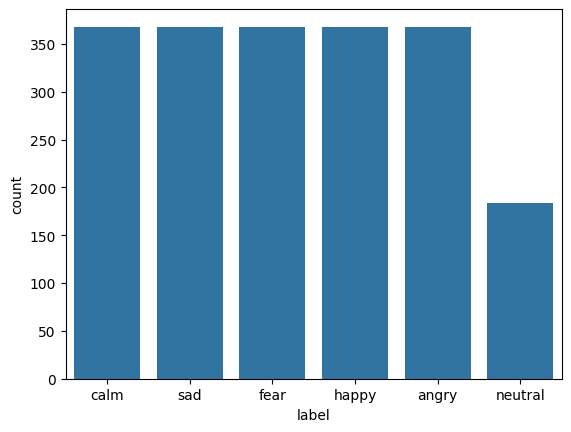

In [258]:
sns.countplot(x='label', data=df)

In [259]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()

def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()

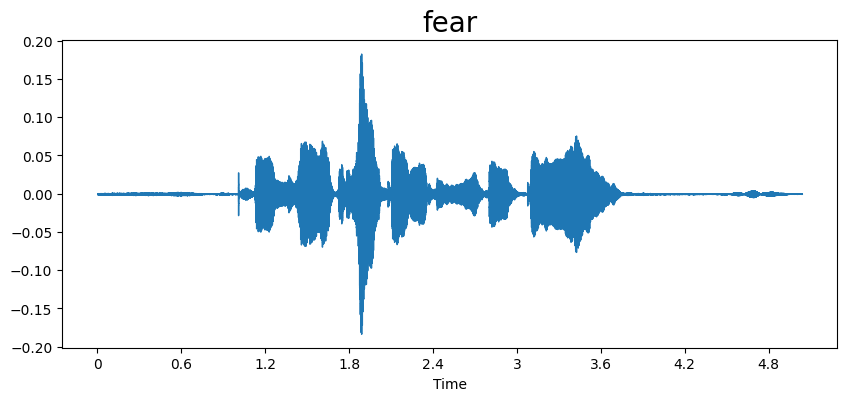

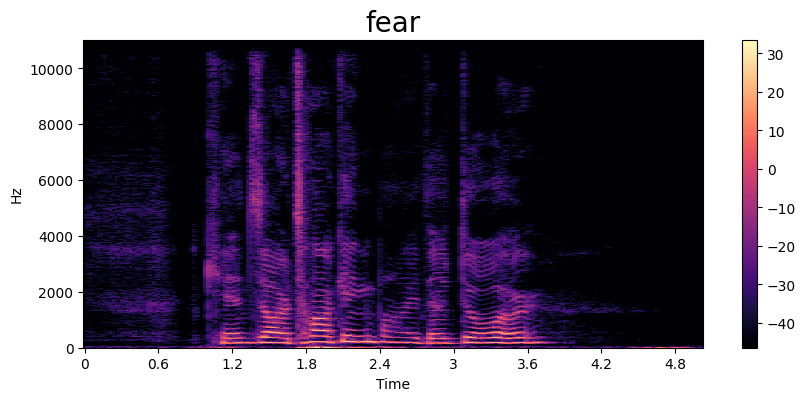

In [260]:
emotion='fear'
path = df[df["label"] == emotion]["speech"].iloc[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

In [261]:
path = df[df["label"] == emotion]["speech"].iloc[0]
path


# Load and plot


'/content/speech/Actor_17/03-02-06-01-01-02-17.wav'

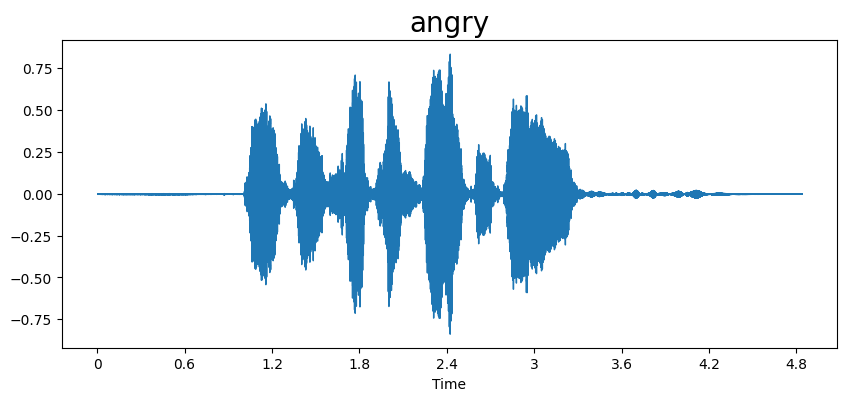

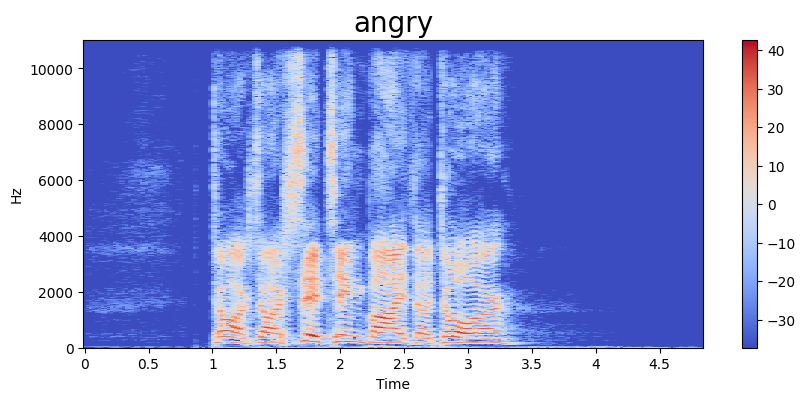

In [262]:
emotion='angry'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


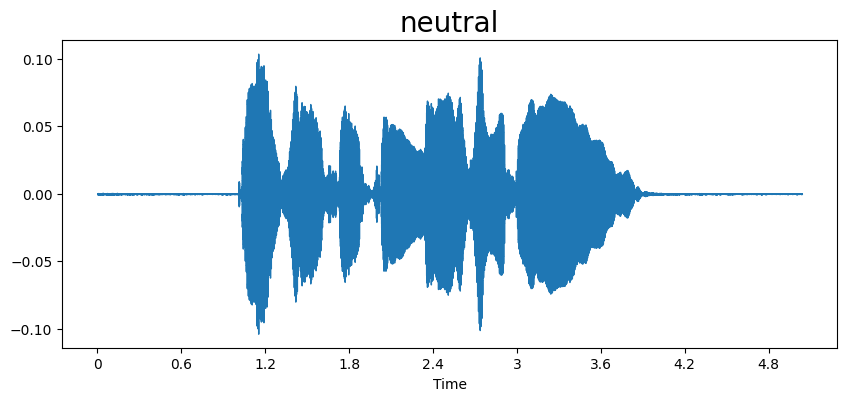

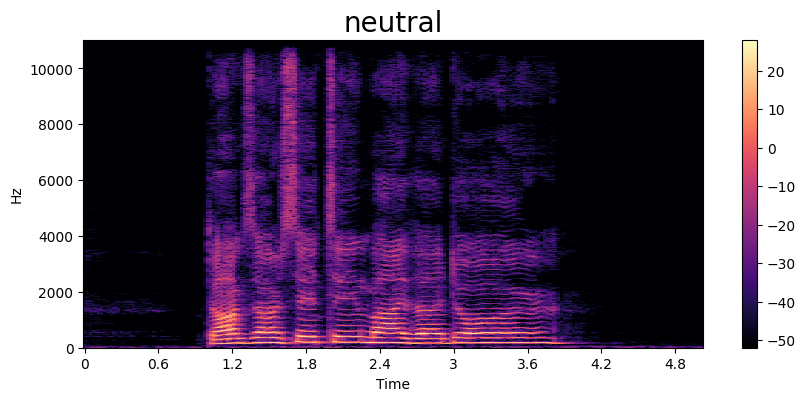

In [263]:
emotion='neutral'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

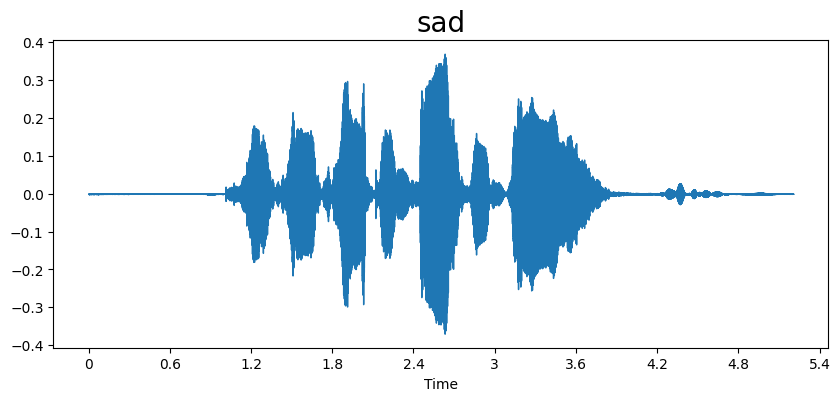

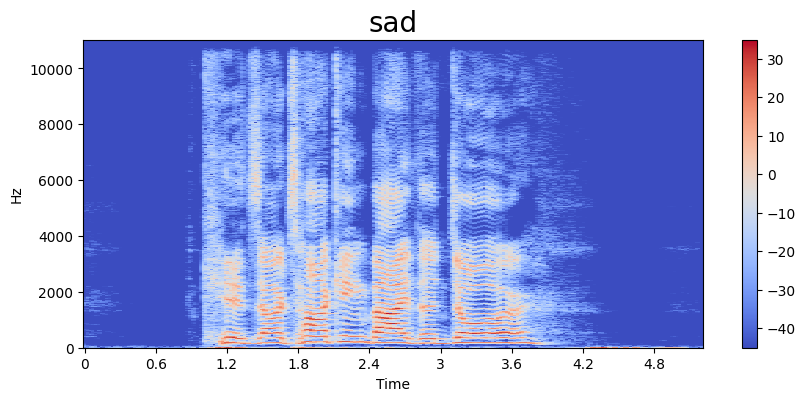

In [264]:
emotion='sad'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

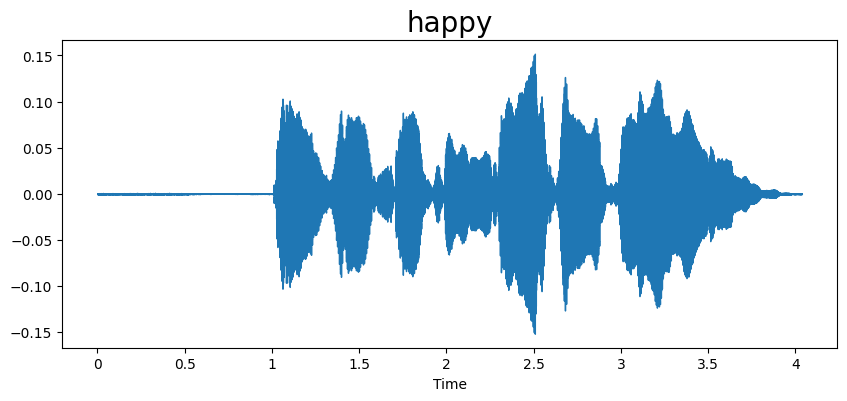

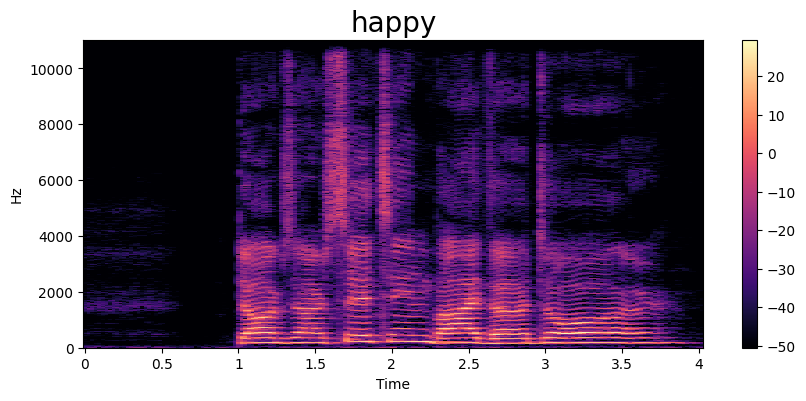

In [265]:
emotion='happy'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

In [266]:
def extract_mfcc(filename):
    y,sr=librosa.load(filename,duration=3,offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [267]:
extract_mfcc(df['speech'][0])

array([-509.1857    ,   88.90451   ,   -5.256763  ,   24.486794  ,
          0.84712595,   -4.5677133 ,   -1.8319416 ,   -6.0316987 ,
        -20.464468  ,   -3.1844964 ,   -8.65194   ,   -5.9584193 ,
          6.2196665 ,   -8.900687  ,   -5.981094  ,    0.7944588 ,
        -11.48561   ,   -7.4045286 ,   -4.5278234 ,   -4.5430326 ,
         -6.350428  ,   -1.36092   ,   -9.718308  ,   -0.78283364,
         -7.2540417 ,    2.5025096 ,   -7.1207423 ,   -2.719774  ,
         -5.1104083 ,    1.8941507 ,    1.0113046 ,    5.89488   ,
          2.8360662 ,   -1.6439608 ,   -5.162561  ,   -3.2853403 ,
          4.7762747 ,   11.42214   ,   18.684052  ,   20.421207  ],
      dtype=float32)

In [268]:
X_mfcc=df['speech'].apply(lambda x: extract_mfcc(x))

In [269]:
X_mfcc

0       [-509.1857, 88.90451, -5.256763, 24.486794, 0....
1       [-339.05823, 70.43023, -33.29996, 14.591556, 5...
2       [-518.75214, 84.2935, 4.5442333, 22.054983, 0....
3       [-469.4966, 84.751045, -1.7122891, 14.987064, ...
4       [-478.18515, 93.053215, 1.2335607, 23.406576, ...
                              ...                        
2019    [-359.55304, 21.535114, -27.937376, -6.87678, ...
2020    [-415.46014, 24.234793, -20.098104, -5.6889725...
2021    [-368.36392, 25.266691, -27.873318, -4.990305,...
2022    [-406.92688, 23.067772, -22.976295, -7.7370057...
2023    [-434.14056, 15.498597, -18.45883, -9.640216, ...
Name: speech, Length: 2024, dtype: object

In [270]:
X=[x for x in X_mfcc]
X=np.array(X)
X.shape

(2024, 40)

In [271]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])

In [272]:
print(y.shape)
y=y.toarray()

(2024, 6)


In [282]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout, Dense, BatchNormalization

model = Sequential([
    Conv1D(128, 5, activation='relu', input_shape=(40, 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(256, 5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_26 (Conv1D)              │ (None, 36, 128)        │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 36, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_24 (MaxPooling1D) │ (None, 18, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_61 (Dropout)            │ (None, 18, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_27 (Conv1D)              │ (None, 14, 256)        │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 14, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_25 (MaxPooling1D) │ (None, 7, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 7, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 128)            │       229,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 396,678 (1.51 MB)

 Trainable params: 395,910 (1.51 MB)

 Non-trainable params: 768 (3.00 KB)

In [283]:

history=model.fit(X,y,validation_split=0.2,epochs=40,batch_size=512,shuffle=True)

Epoch 1/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 508ms/step - accuracy: 0.2096 - loss: 3.1998 - val_accuracy: 0.2617 - val_loss: 2.9289
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 322ms/step - accuracy: 0.3535 - loss: 1.7556 - val_accuracy: 0.1827 - val_loss: 2.5445
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 329ms/step - accuracy: 0.4544 - loss: 1.4393 - val_accuracy: 0.1778 - val_loss: 2.5674
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 323ms/step - accuracy: 0.5168 - loss: 1.2558 - val_accuracy: 0.2395 - val_loss: 2.6740
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 275ms/step - accuracy: 0.5905 - loss: 1.0794 - val_accuracy: 0.2716 - val_loss: 2.5762
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 373ms/step - accuracy: 0.6468 - loss: 0.9333 - val_accuracy: 0.3383 - val_loss: 2.4066
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 374ms/step - accuracy: 0.6721 - loss: 0.8677 - val_accuracy: 0.3827 - val_loss: 2.4062
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step - accuracy: 0.6831 - loss: 0.8057 - val_accuracy: 0.4198 - val_loss:

In [284]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [285]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)




In [286]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


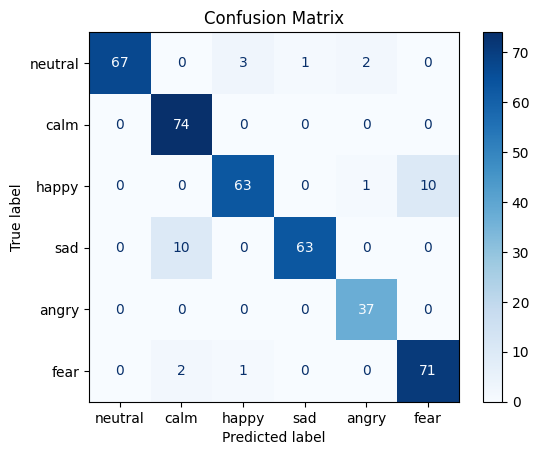

In [287]:
cm = confusion_matrix(y_true, y_pred_classes)
labels = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fear']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


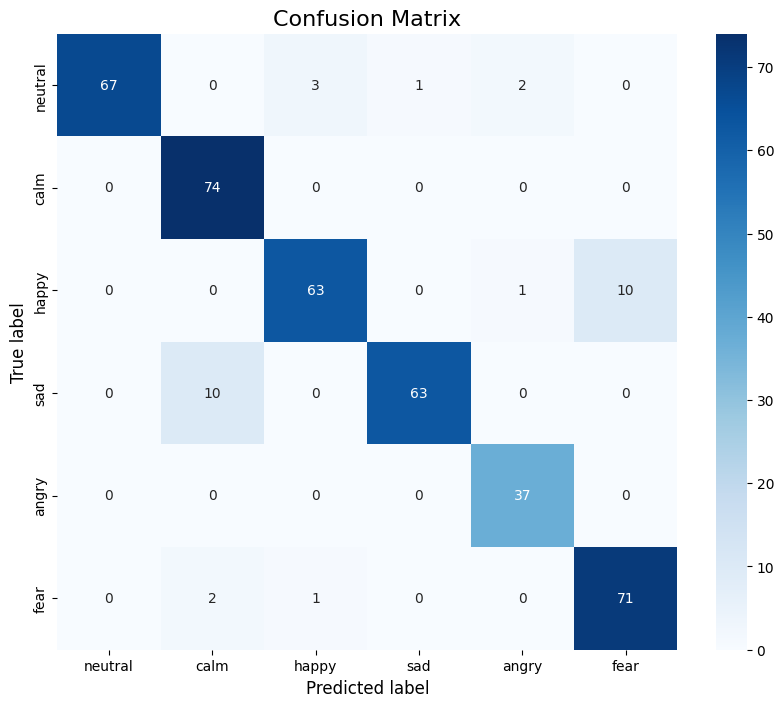


🔍 Classification Report:
              precision  recall  f1-score  support
neutral            1.00    0.92      0.96    73.00
calm               0.86    1.00      0.92    74.00
happy              0.94    0.85      0.89    74.00
sad                0.98    0.86      0.92    73.00
angry              0.92    1.00      0.96    37.00
fear               0.88    0.96      0.92    74.00
accuracy           0.93    0.93      0.93     0.93
macro avg          0.93    0.93      0.93   405.00
weighted avg       0.93    0.93      0.93   405.00


In [288]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Predict on validation set
y_pred_probs = model.predict(X_val)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Define class labels
class_labels = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fear']

# Generate confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
cr = classification_report(y_true_classes, y_pred_classes, target_names=class_labels, digits=2, output_dict=True)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show()

# Print classification report in table format
from pandas import DataFrame

# Convert classification report to DataFrame
report_df = DataFrame(cr).transpose()

# Print classification report
print("\n🔍 Classification Report:")
print(report_df.round(2))


In [289]:
# Calculate accuracy for each label
accuracies = np.diag(cm) / cm.sum(axis=1)

# Define emotion labels
emotion_labels = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fear']

# Display accuracies
for label, accuracy in enumerate(accuracies):
    print(f"accuracy of predicting {emotion_labels[label]} i.e {label} correctly = {accuracy:.2%}")

accuracy of predicting neutral i.e 0 correctly = 91.78%
accuracy of predicting calm i.e 1 correctly = 100.00%
accuracy of predicting happy i.e 2 correctly = 85.14%
accuracy of predicting sad i.e 3 correctly = 86.30%
accuracy of predicting angry i.e 4 correctly = 100.00%
accuracy of predicting fear i.e 5 correctly = 95.95%
